# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot and set inline plotting 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1) Loading the data (which is stored in the file train.csv)

In [2]:
df = pd.read_csv('train.csv')

## 2) Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [20]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [5]:
df['crim'].median()

0.26169000000000003

In [6]:
df['nox'].mode()

0    0.538
1    0.713
dtype: float64

In [7]:
df['black'].std()

86.584566857184

In [8]:
df.quantile(.9)

ID         460.800000
crim         9.958202
zn          39.000000
indus       19.580000
chas         0.000000
nox          0.713000
rm           7.106400
age         98.400000
dis          6.588800
rad         24.000000
tax        666.000000
ptratio     20.900000
black      396.900000
lstat       22.502000
medv        35.060000
Name: 0.9, dtype: float64

## 3) Create meaningful subsets of the data using selection operations using .loc, .iloc or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. 

Examples of potential splits:
* Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
* Create 2 new dataframes based on a certain split for crime rate.

#### Split data by proximity to Charles River (now that you've got me curious')
I believe we will see lower centrality measures from crime rates (CRIM) for properties near the river (CHAS). Water front property is normally lower crime rate from my own experience as the neighborhodds are often more secure and exclusive.

In [28]:
test = df.loc[df['chas'] == 0]
#appears only 0 values for chas occur in the test dataset?

#### Split data by crime rate (CRIM) (lower than mean and greater than or equal to mean) and look at weighted mean of distances to five Boston employment centers (DIS)
I expect that the centrality measures will differ in proximity to employment centers but I'm not sure in which way. On one hand, higher crime rates might have a closer average proximity to employment centers (and thus higher mean, median, and mode) as the employment centers might have been built to reduce crime rate in those areas by providing employment opportunities. 

Alternatvely, lower crime rates might have a closer average proximity to employment centers (and thus higher mean, median, and mode) as the employment centers might have been built to reduce crime rate in those areas by providing employment opportunities and have already done so successfully.

I would like to see the crime rates before an after the construction of the employment centers and their effect on overall crime rate. I would also like to see the dates when these employment centers were completed.

In [29]:
crim_greater_than_mean = df.loc[df['crim'] >= 3.360341]
crim_less_than_mean = df.loc[df['crim'] <= 3.360341]

In [34]:
crim_greater_than_mean.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,80.000000,80.000000,80.0,8.000000e+01,80.0,80.000000,80.000000,80.000000,80.000000,80.0,80.0,8.000000e+01,80.000000,80.000000,80.000000
mean,427.625000,12.263032,0.0,1.810000e+01,0.0,0.674025,5.901562,90.548750,2.090876,24.0,666.0,2.020000e+01,293.159125,19.043375,15.956250
std,37.567618,10.842286,0.0,1.787564e-14,0.0,0.059424,0.707231,10.711239,0.565810,0.0,0.0,2.860103e-14,143.648573,6.780364,7.618164
min,360.000000,3.568680,0.0,1.810000e+01,0.0,0.532000,3.561000,53.200000,1.137000,24.0,666.0,2.020000e+01,3.500000,3.260000,5.000000
25%,394.500000,5.685405,0.0,1.810000e+01,0.0,0.631000,5.532000,86.050000,1.655525,24.0,666.0,2.020000e+01,191.082500,14.617500,11.225000
50%,432.500000,9.280695,0.0,1.810000e+01,0.0,0.693000,6.113000,94.600000,1.983150,24.0,666.0,2.020000e+01,379.040000,18.130000,14.200000
75%,460.250000,14.260575,0.0,1.810000e+01,0.0,0.713000,6.384500,99.000000,2.466800,24.0,666.0,2.020000e+01,396.900000,23.330000,19.525000
max,488.000000,73.534100,0.0,1.810000e+01,0.0,0.770000,7.393000,100.000000,3.545900,24.0,666.0,2.020000e+01,396.900000,37.970000,50.000000


In [33]:
print("The mean distance to an employement center of the high crime rate dataset:", 
      crim_greater_than_mean['dis'].mean())
print("The median distance to an employement center of the high crime rate dataset:", 
      crim_greater_than_mean['dis'].median())
print("The most occuring distance to an employement center of the high crime rate dataset:", 
      crim_greater_than_mean['dis'].mode())
print("The standard deviation in mean distance to an employement center of the high crime rate dataset:", 
      crim_greater_than_mean['dis'].std())

The mean distance to an employement center of the high crime rate dataset: 2.09087625
The median distance to an employement center of the high crime rate dataset: 1.98315
The most occuring distance to an employement center of the high crime rate dataset: 0     1.1370
1     1.1691
2     1.1742
3     1.2852
4     1.3325
5     1.3449
6     1.3580
7     1.4395
8     1.4547
9     1.4672
10    1.4896
11    1.5106
12    1.5184
13    1.5331
14    1.5741
15    1.5804
16    1.5888
17    1.5894
18    1.6132
19    1.6475
20    1.6582
21    1.6768
22    1.7028
23    1.7281
24    1.7523
25    1.7700
26    1.7821
27    1.7940
28    1.8026
29    1.8172
       ...  
50    2.2004
51    2.2222
52    2.2616
53    2.3053
54    2.3158
55    2.3552
56    2.3682
57    2.4298
58    2.4358
59    2.4527
60    2.5091
61    2.5182
62    2.5403
63    2.5671
64    2.5975
65    2.7175
66    2.7344
67    2.7792
68    2.7831
69    2.8016
70    2.8237
71    2.8715
72    2.8965
73    2.9084
74    2.9634
75    3.0993
76  

In [35]:
crim_less_than_mean.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,253.000000,253.000000,253.000000,253.000000,253.0,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,174.881423,0.374196,13.397233,8.166522,0.0,0.473261,5.860755,55.174704,3.979237,4.308300,296.913043,16.519763,350.339368,9.572372,22.537549
std,131.162786,0.636340,24.626925,6.844212,0.0,0.166791,1.829591,31.673510,2.255915,2.926312,126.118961,5.285725,110.057812,6.127398,10.156520
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,0.045900,0.000000,3.440000,0.0,0.433000,5.869000,31.100000,2.346000,3.000000,245.000000,15.300000,377.170000,5.500000,18.700000
50%,162.000000,0.114600,0.000000,6.200000,0.0,0.489000,6.145000,56.500000,3.759800,4.000000,300.000000,17.900000,392.300000,8.930000,22.200000
75%,267.000000,0.330450,20.000000,10.010000,0.0,0.544000,6.618000,84.200000,5.491700,5.000000,384.000000,19.200000,395.990000,12.860000,26.400000
max,506.000000,3.163600,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [36]:
print("The mean distance to an employement center of the low crime rate dataset:", 
      crim_less_than_mean['dis'].mean())
print("The median distance to an employement center of the low crime rate dataset:", 
      crim_less_than_mean['dis'].median())
print("The most occuring distance to an employement center of the low crime rate dataset:", 
      crim_less_than_mean['dis'].mode())
print("The standard deviation in mean distance to an employement center of the low crime rate dataset:", 
      crim_less_than_mean['dis'].std())

The mean distance to an employement center of the low crime rate dataset: 3.9792371541501987
The median distance to an employement center of the low crime rate dataset: 3.7598
The most occuring distance to an employement center of the low crime rate dataset: 0    0.0
dtype: float64
The standard deviation in mean distance to an employement center of the low crime rate dataset: 2.2559145616725984


#### Split data by levels of NOX and see which have lower proportion of reseidential land
I expect the to groups will differ in measures of centrality for proportion of residential land. The centrality measures will me lower with high NOX group, as I believe this would likely be produced by businesses.

In [37]:
nox_greater_than_mean = df.loc[df['nox'] >= 0.557144]
nox_less_than_mean = df.loc[df['nox'] <= 0.557144]

In [38]:
nox_greater_than_mean.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,352.106870,7.784566,1.221374,17.977634,0.0,0.666336,5.993084,89.793130,2.066204,16.114504,551.022901,19.070992,318.343435,17.451679,18.398473
std,131.792392,10.152139,4.807510,4.685793,0.0,0.075753,0.731208,12.186362,0.486654,9.794536,163.730664,2.457093,122.742719,7.205496,9.056209
min,121.000000,0.045270,0.000000,3.970000,0.0,0.573000,3.561000,41.900000,1.137000,1.000000,188.000000,13.000000,3.500000,1.730000,5.000000
25%,216.500000,1.084555,0.000000,18.100000,0.0,0.605000,5.615000,84.650000,1.732250,5.000000,403.000000,19.200000,315.335000,13.165000,12.950000
50%,402.000000,4.835670,0.000000,18.100000,0.0,0.655000,5.987000,94.500000,2.004800,24.000000,666.000000,20.200000,379.700000,16.740000,17.200000
75%,457.000000,10.014420,0.000000,19.580000,0.0,0.713000,6.400000,98.200000,2.374950,24.000000,666.000000,20.200000,395.730000,21.385000,21.100000
max,506.000000,73.534100,20.000000,27.740000,0.0,0.871000,8.398000,100.000000,3.724000,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [42]:
print("The mean proportion of reseidential land of the high nox dataset:", 
      nox_greater_than_mean['zn'].mean())
print("The median proportion of reseidential land of the high nox dataset:", 
      nox_greater_than_mean['zn'].median())
print("The most occuring proportion of reseidential land of the high nox dataset:", 
      nox_greater_than_mean['zn'].mode())
print("The standard deviation in proportion of reseidential land of the high nox dataset:", 
      nox_greater_than_mean['zn'].std())

The mean proportion of reseidential land of the high nox dataset: 1.2213740458015268
The median proportion of reseidential land of the high nox dataset: 0.0
The most occuring proportion of reseidential land of the high nox dataset: 0    0.0
dtype: float64
The standard deviation in proportion of reseidential land of the high nox dataset: 4.807510272537342


In [40]:
nox_less_than_mean.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,202.000000,202.000000,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,160.044554,0.276911,15.987624,5.737921,0.0,0.427560,5.791099,46.733663,4.472002,4.450495,278.292079,16.322772,348.443564,8.213416,22.615347
std,124.990320,0.713387,26.711301,3.890829,0.0,0.149004,2.007960,29.191857,2.267850,3.487009,119.957907,5.677395,119.091582,4.994401,10.254848
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.250000,0.035405,0.000000,2.935000,0.0,0.428000,5.919250,22.575000,3.100100,3.000000,233.000000,16.225000,382.637500,5.032500,19.400000
50%,146.500000,0.088510,0.000000,5.255000,0.0,0.455500,6.241000,45.500000,4.428100,4.000000,296.000000,17.900000,393.150000,7.735000,22.850000
75%,272.750000,0.203408,24.250000,8.140000,0.0,0.515000,6.633750,71.850000,6.081325,5.000000,329.000000,19.100000,396.232500,10.712500,26.975000
max,484.000000,5.824010,100.000000,18.100000,0.0,0.547000,8.725000,100.000000,10.710300,24.000000,666.000000,21.100000,396.900000,29.550000,50.000000


In [43]:
print("The mean proportion of reseidential land of the low nox dataset:", 
      nox_less_than_mean['zn'].mean())
print("The median proportion of reseidential land of the low nox dataset:", 
      nox_less_than_mean['zn'].median())
print("The most occuring proportion of reseidential land of the low nox dataset:", 
      nox_less_than_mean['zn'].mode())
print("The standard deviation in proportion of reseidential land of the low nox dataset:", 
      nox_less_than_mean['zn'].std())

The mean proportion of reseidential land of the low nox dataset: 15.987623762376238
The median proportion of reseidential land of the low nox dataset: 0.0
The most occuring proportion of reseidential land of the low nox dataset: 0    0.0
dtype: float64
The standard deviation in proportion of reseidential land of the low nox dataset: 26.71130148759556


#### Split data by median value of owner-occupied homes (medv) (lower than mean of the test set and greater than or equal to mean) and look at index of accessibility to radial highways (rad).
I expect that the centrality measures will show that dataset with higher than mean home values will have a higher mean, median, and mode rad - i.e. the median value of a home if greater as the number of accessibile radial highways increases.

In [44]:
medv_greater_than_mean = df.loc[df['medv'] >= 22.768769]
medv_less_than_mean = df.loc[df['medv'] <= 22.768769]

In [45]:
medv_less_than_mean.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,206.000000,206.000000,206.000000,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,251.490291,4.738262,3.402913,12.801262,0.0,0.537112,5.375291,71.004854,2.903150,10.810680,423.951456,17.405825,307.211214,14.751845,15.360194
std,179.425336,8.894068,12.602373,7.495441,0.0,0.205894,1.821627,31.491070,1.955415,9.923516,219.000719,5.971809,144.615473,7.783179,6.459704
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.250000,0.093188,0.000000,6.910000,0.0,0.474000,5.598250,52.825000,1.773025,4.000000,284.750000,17.800000,295.812500,10.262500,12.700000
50%,293.500000,0.369840,0.000000,18.100000,0.0,0.580500,5.945500,84.300000,2.385200,5.000000,403.000000,20.200000,389.270000,14.320000,17.450000
75%,429.750000,6.301050,0.000000,18.100000,0.0,0.679000,6.208750,95.675000,3.969025,24.000000,666.000000,20.200000,396.285000,18.710000,20.075000
max,506.000000,73.534100,80.000000,27.740000,0.0,0.871000,7.393000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,22.700000


In [46]:
print("The mean index of accessibility to radial highways of the low value of owner-occupied homes dataset:", 
      medv_less_than_mean['rad'].mean())
print("The median index of accessibility to radial highways of the low value of owner-occupied homes dataset:", 
      medv_less_than_mean['rad'].median())
print("The most occuring index of accessibility to radial highways of the low value of owner-occupied homes dataset:", 
      medv_less_than_mean['rad'].mode())
print("The standard deviation in index of accessibility to radial highways of the low value of owner-occupied homes dataset:", 
      medv_less_than_mean['rad'].std())

The mean index of accessibility to radial highways of the low value of owner-occupied homes dataset: 10.810679611650485
The median index of accessibility to radial highways of the low value of owner-occupied homes dataset: 5.0
The most occuring index of accessibility to radial highways of the low value of owner-occupied homes dataset: 0    24
dtype: int64
The standard deviation in index of accessibility to radial highways of the low value of owner-occupied homes dataset: 9.923516416697282


In [47]:
medv_greater_than_mean.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,127.000000,127.000000,127.000000,127.000000,127.0,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,209.826772,0.784506,21.169291,6.906063,0.0,0.496158,6.673906,51.780315,4.535182,6.165354,323.346457,17.400787,384.276220,7.137008,30.033858
std,112.455359,2.061319,29.057566,5.311233,0.0,0.085312,0.747554,28.949505,2.053624,5.523060,114.812917,2.094986,31.798017,3.531241,7.838704
min,1.000000,0.006320,0.000000,0.740000,0.0,0.398000,3.561000,6.000000,1.169100,1.000000,193.000000,12.600000,131.420000,1.730000,22.800000
25%,107.000000,0.051805,0.000000,3.390000,0.0,0.432000,6.259000,28.000000,2.883200,4.000000,264.000000,15.800000,384.675000,4.855000,23.950000
50%,207.000000,0.100080,0.000000,4.950000,0.0,0.488000,6.618000,51.000000,4.090000,5.000000,296.000000,17.800000,393.070000,6.560000,27.100000
75%,283.500000,0.407200,31.500000,8.350000,0.0,0.520000,7.051500,79.550000,5.846250,7.000000,332.500000,19.050000,395.630000,8.640000,33.400000
max,504.000000,13.522200,100.000000,19.580000,0.0,0.871000,8.725000,100.000000,9.222900,24.000000,666.000000,21.000000,396.900000,29.550000,50.000000


In [48]:
print("The mean index of accessibility to radial highways of the high value of owner-occupied homes dataset:", 
      medv_greater_than_mean['rad'].mean())
print("The median index of accessibility to radial highways of the high value of owner-occupied homes dataset:", 
      medv_greater_than_mean['rad'].median())
print("The most occuring index of accessibility to radial highways of the high value of owner-occupied homes dataset:", 
      medv_greater_than_mean['rad'].mode())
print("The standard deviation in index of accessibility to radial highways of the high value of owner-occupied homes dataset:", 
      medv_greater_than_mean['rad'].std())

The mean index of accessibility to radial highways of the high value of owner-occupied homes dataset: 6.165354330708661
The median index of accessibility to radial highways of the high value of owner-occupied homes dataset: 5.0
The most occuring index of accessibility to radial highways of the high value of owner-occupied homes dataset: 0    5
dtype: int64
The standard deviation in index of accessibility to radial highways of the high value of owner-occupied homes dataset: 5.523059566637674


## 4) Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

#### Split data by crime rate (CRIM) (lower than mean and greater than or equal to mean) and look at weighted mean of distances to five Boston employment centers (DIS)

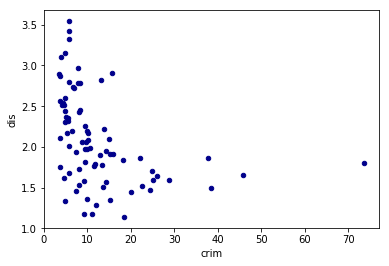

In [58]:
#scatter
ax1_1 = crim_greater_than_mean.plot.scatter(x='crim',
                      y='dis',
                      c='DarkBlue')

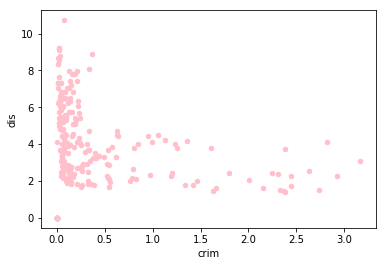

In [62]:
#scatter
ax1_2 = crim_less_than_mean.plot.scatter(x='crim',
                      y='dis',
                      c='Pink')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A8DAC18>]], dtype=object)

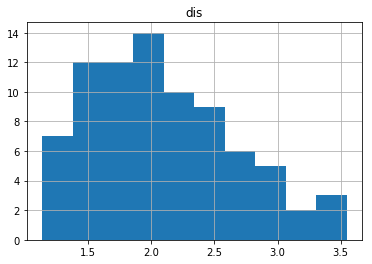

In [52]:
crim_greater_than_mean.hist(column='dis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE1AFD0>]], dtype=object)

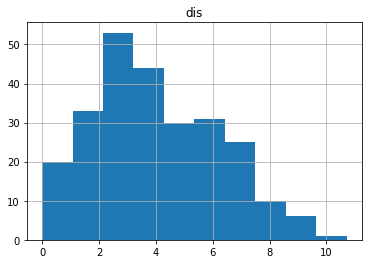

In [53]:
crim_less_than_mean.hist(column='dis')

#### Split data by levels of NOX and see which have lower proportion of reseidential land (zn)

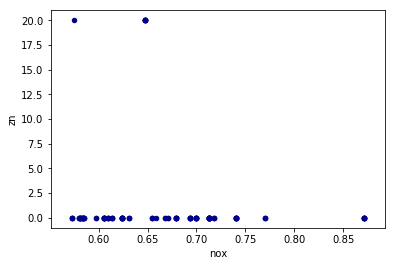

In [60]:
#scatter
ax2_1 = nox_greater_than_mean.plot.scatter(x='nox',
                      y='zn',
                      c='DarkBlue')

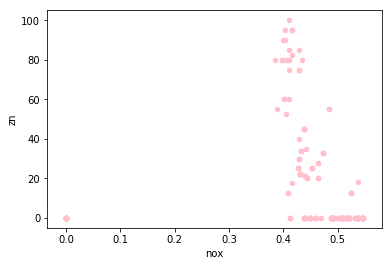

In [61]:
#scatter
ax2_2 = nox_less_than_mean.plot.scatter(x='nox',
                      y='zn',
                      c='Pink')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AF985F8>]], dtype=object)

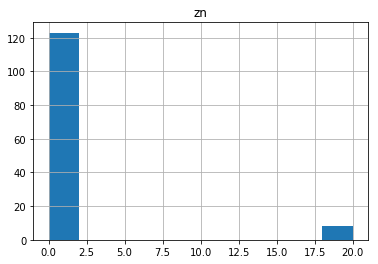

In [54]:
nox_greater_than_mean.hist(column='zn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AFE90F0>]], dtype=object)

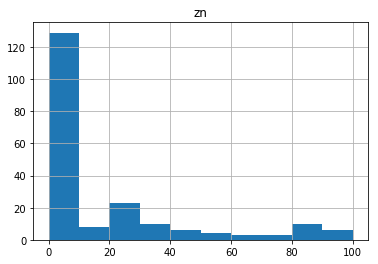

In [55]:
nox_less_than_mean.hist(column='zn')

#### Split data by median value of owner-occupied homes (medv) (lower than mean of the test set and greater than or equal to mean) and look at index of accessibility to radial highways (rad).

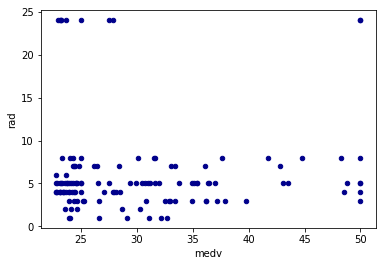

In [63]:
#scatter
ax3_1 = medv_greater_than_mean.plot.scatter(x='medv',
                      y='rad',
                      c='DarkBlue')

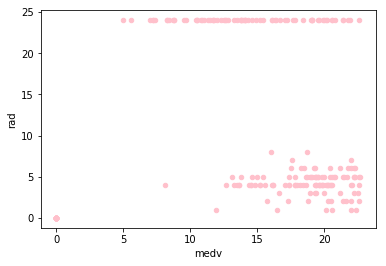

In [64]:
#scatter
ax3_2 = medv_less_than_mean.plot.scatter(x='medv',
                      y='rad',
                      c='Pink')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C103748>]], dtype=object)

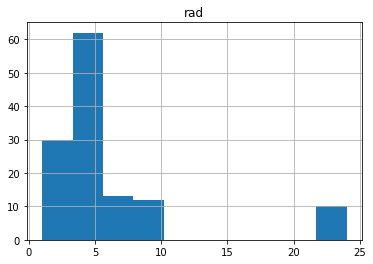

In [56]:
medv_greater_than_mean.hist(column='rad')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C166240>]], dtype=object)

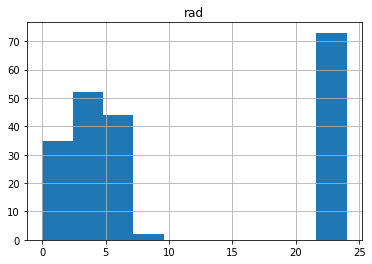

In [57]:
medv_less_than_mean.hist(column='rad')